<a href="https://colab.research.google.com/github/mercuryyujia/LSTM_VIX_pred/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('^VIX')
df=data
df = df[df['Date'] >= '2020-01-02']
df = df.reset_index(drop=True)
df.head()

/var/folders/w5/stmv05y902lgqhztwd4kh4lm0000gn/T/ipykernel_41628/3830313737.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
0,2020-01-02,12.47,13.720000,12.42,13.46,0
1,2020-01-03,14.02,16.200001,13.13,15.01,0
2,2020-01-06,13.85,16.389999,13.54,15.45,0
3,2020-01-07,13.79,14.460000,13.39,13.84,0
4,2020-01-08,13.45,15.240000,12.83,15.16,0


In [ ]:
df = df.drop(['Date', 'Volume'], axis = 1)
df.head()

/var/folders/w5/stmv05y902lgqhztwd4kh4lm0000gn/T/ipykernel_41628/1444969676.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Volume'], axis = 1)


Price,Close,High,Low,Open
Ticker,^VIX,^VIX,^VIX,^VIX
0,12.47,13.720000,12.42,13.46
1,14.02,16.200001,13.13,15.01
2,13.85,16.389999,13.54,15.45
3,13.79,14.460000,13.39,13.84
4,13.45,15.240000,12.83,15.16


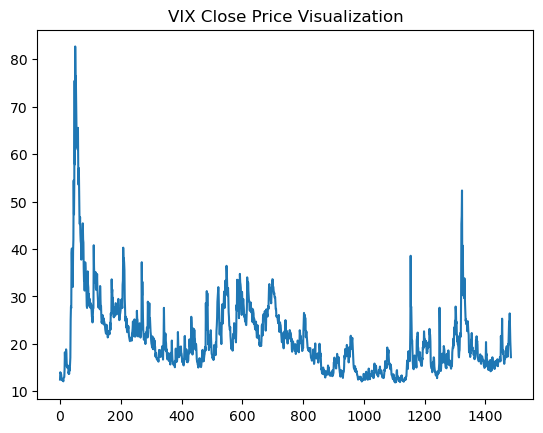

In [ ]:
plt.title("VIX Close Price Visualization")
plt.plot(df.Close)

In [ ]:
df

Price,Close,High,Low,Open
Ticker,^VIX,^VIX,^VIX,^VIX
0,12.470000,13.720000,12.420000,13.460000
1,14.020000,16.200001,13.130000,15.010000
2,13.850000,16.389999,13.540000,15.450000
3,13.790000,14.460000,13.390000,13.840000
4,13.450000,15.240000,12.830000,15.160000
...,...,...,...,...
1480,26.420000,28.270000,19.280001,20.780001
1481,23.430000,27.840000,22.540001,25.969999
1482,20.520000,23.680000,20.410000,22.690001


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,^VIX
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1480,17.0257
1481,17.0936
1482,17.1350
1483,17.1427


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

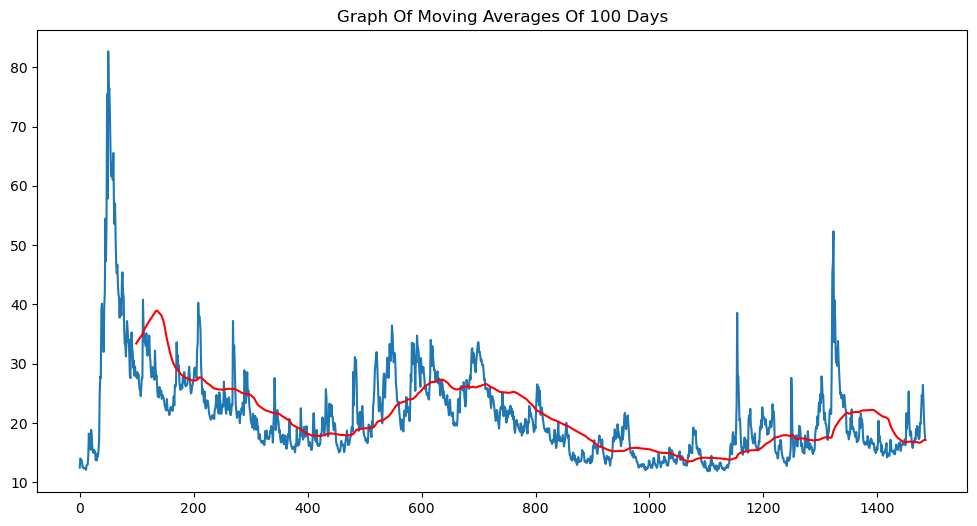

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,^VIX
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1480,19.57825
1481,19.61790
1482,19.63780
1483,19.65155


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

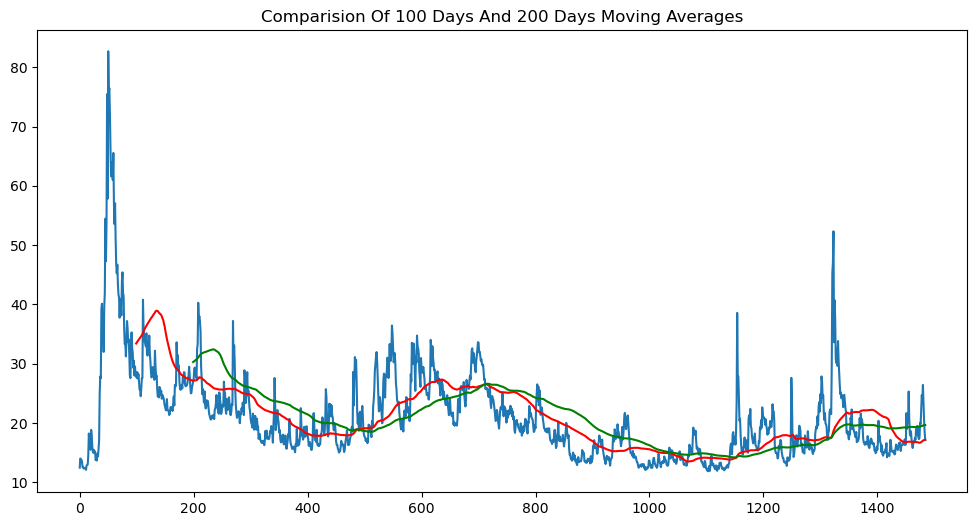

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(1485, 4)

# Spliting the dataset into training and testing set

In [ ]:
# Splitting data into training and testing

train = data[data['Date'] < '2025-10-01']
test = data[data['Date'] >= '2025-10-01']

print(train.shape)
print(test.shape)

(2702, 6)
(41, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
0,2015-01-02,17.790001,20.139999,17.049999,17.760000,0
1,2015-01-05,19.920000,21.290001,19.190001,19.190001,0
2,2015-01-06,21.120001,22.900000,19.520000,20.330000,0
3,2015-01-07,19.309999,20.719999,19.040001,20.150000,0
4,2015-01-08,17.010000,18.090000,16.990000,17.930000,0


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
2702,2025-10-01,16.290001,17.280001,15.980000,17.280001,0
2703,2025-10-02,16.629999,16.920000,15.930000,16.120001,0
2704,2025-10-03,16.650000,17.059999,16.200001,16.350000,0
2705,2025-10-06,16.370001,17.090000,16.290001,16.740000,0
2706,2025-10-07,17.240000,17.549999,16.190001,16.580000,0


# Using MinMax scaler for normalization of the dataset

---



In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [111]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [112]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.11875678],
       [0.13816504],
       [0.15363734],
       ...,
       [0.10694895],
       [0.09269815],
       [0.10152008]])

In [113]:
x_train = []
y_train = []

for i in range(50, data_training_array.shape[0]):
    x_train.append(data_training_array[i-50: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [114]:
data_testing_array = scaler.fit_transform(test_close)

window_size = 50

test_input = np.concatenate((data_training_array[-window_size:], data_testing_array), axis=0)

x_test = []
y_test = []

for i in range(window_size, test_input.shape[0]):
    x_test.append(test_input[i - window_size:i])
    y_test.append(test_input[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [115]:
x_train.shape

(2652, 50, 1)

# ML Model (LSTM)

---



In [117]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [118]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'tanh', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [120]:
import tensorflow as tf
from tensorflow.keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [121]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [rmse] )
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 20, verbose=1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0070 - rmse: 0.1194 - val_loss: 0.0675 - val_rmse: 0.2670
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - rmse: 0.1231 - val_loss: 0.0606 - val_rmse: 0.2438
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - rmse: 0.1272 - val_loss: 0.0628 - val_rmse: 0.2395
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - rmse: 0.1296 - val_loss: 0.0624 - val_rmse: 0.2407
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - rmse: 0.1313 - val_loss: 0.0576 - val_rmse: 0.2443
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - rmse: 0.1279 - val_loss: 0.0556 - val_rmse: 0.2488
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - rmse: 0.1290 - val_loss: 0.0573 - val_rmse: 0.2545
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - rmse: 0.1305 - val_loss: 0.0497 - val_rmse: 0.2490
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/st

In [109]:
tf.keras.backend.clear_session()

In [122]:
model.save('lstm_model_50d_30_epochs_tanh.keras')

In [141]:
test_close.shape
test_close

array([[17.28000069],
       [16.12000084],
       [16.35000038],
       [16.73999977],
       [16.57999992],
       [17.17000008],
       [16.30999947],
       [16.36000061],
       [19.45000076],
       [21.45999908],
       [20.02000046],
       [20.48999977],
       [28.40999985],
       [20.53000069],
       [18.64999962],
       [17.84000015],
       [18.36000061],
       [17.02000046],
       [15.72999954],
       [15.94999981],
       [16.34000015],
       [16.26000023],
       [16.43000031],
       [18.05999947],
       [19.72999954],
       [19.37000084],
       [18.36000061],
       [19.52000046],
       [18.57999992],
       [17.89999962],
       [17.20999908],
       [17.61000061],
       [21.32999992],
       [19.57999992],
       [23.54000092],
       [24.52000046],
       [20.78000069],
       [25.96999931],
       [22.69000053],
       [20.54999924],
       [18.25      ],
       [17.40999985]])

In [142]:
past_50_days = pd.DataFrame(train_close[-50:])

In [143]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [144]:
final_df = pd.concat([past_50_days, test_df], ignore_index = True)

In [145]:
final_df.head()

,0
0,16.75
1,16.23
2,15.39
3,15.33
4,15.15


In [146]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.17304962],
       [0.13617016],
       [0.07659574],
       [0.07234039],
       [0.05957441],
       [0.04539003],
       [0.11063826],
       [0.04822691],
       [0.21914889],
       [0.37234037],
       [0.20567367],
       [0.20638291],
       [0.14893614],
       [0.15390065],
       [0.10638298],
       [0.12624112],
       [0.02198578],
       [0.02482266],
       [0.00851063],
       [0.10070916],
       [0.06524817],
       [0.11631202],
       [0.09999999],
       [0.1773049 ],
       [0.05248226],
       [0.10212763],
       [0.02482266],
       [0.00780139],
       [0.        ],
       [0.1659574 ],
       [0.21914889],
       [0.13546092],
       [0.06524817],
       [0.09007089],
       [0.05035461],
       [0.04751767],
       [0.06241129],
       [0.02198578],
       [0.05886525],
       [0.09148936],
       [0.14964537],
       [0.04397162],
       [0.10283687],
       [0.12978717],
       [0.12695036],
       [0.16028364],
       [0.15886517],
       [0.182

In [147]:
input_data.shape

(92, 1)

# Testing the model

---



In [148]:
x_test = []
y_test = []
for i in range(50, input_data.shape[0]):
   x_test.append(input_data[i-50: i])
   y_test.append(input_data[i, 0])

In [149]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(42, 50, 1)
(42,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [150]:
# Making predictions

y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [151]:
y_pred.shape

(42, 1)

In [152]:
y_test

array([0.21063833, 0.12836883, 0.14468085, 0.17234039, 0.16099288,
       0.20283686, 0.14184391, 0.14539009, 0.36453905, 0.50709212,
       0.40496456, 0.43829784, 1.        , 0.44113479, 0.30780137,
       0.2503546 , 0.28723407, 0.19219859, 0.10070916, 0.11631202,
       0.14397162, 0.13829786, 0.15035461, 0.26595739, 0.38439712,
       0.35886529, 0.28723407, 0.36950356, 0.30283686, 0.25460988,
       0.20567367, 0.23404258, 0.49787233, 0.37375885, 0.65460999,
       0.72411351, 0.45886529, 0.82695031, 0.59432627, 0.44255313,
       0.27943261, 0.21985812])

In [153]:
y_pred

array([[0.12744185],
       [0.15912575],
       [0.15246643],
       [0.13859831],
       [0.14451262],
       [0.150785  ],
       [0.17153329],
       [0.160285  ],
       [0.14246899],
       [0.23688333],
       [0.407237  ],
       [0.4364863 ],
       [0.41372824],
       [0.7348253 ],
       [0.5926632 ],
       [0.352413  ],
       [0.20534672],
       [0.18929674],
       [0.19017524],
       [0.15183334],
       [0.12443002],
       [0.12902065],
       [0.13958119],
       [0.14831397],
       [0.20344253],
       [0.3078659 ],
       [0.35429078],
       [0.31299436],
       [0.30702776],
       [0.2891249 ],
       [0.25182194],
       [0.20751342],
       [0.1986767 ],
       [0.3429051 ],
       [0.39850998],
       [0.5338755 ],
       [0.658064  ],
       [0.52716947],
       [0.61337143],
       [0.58422333],
       [0.44992816],
       [0.29825604]], dtype=float32)

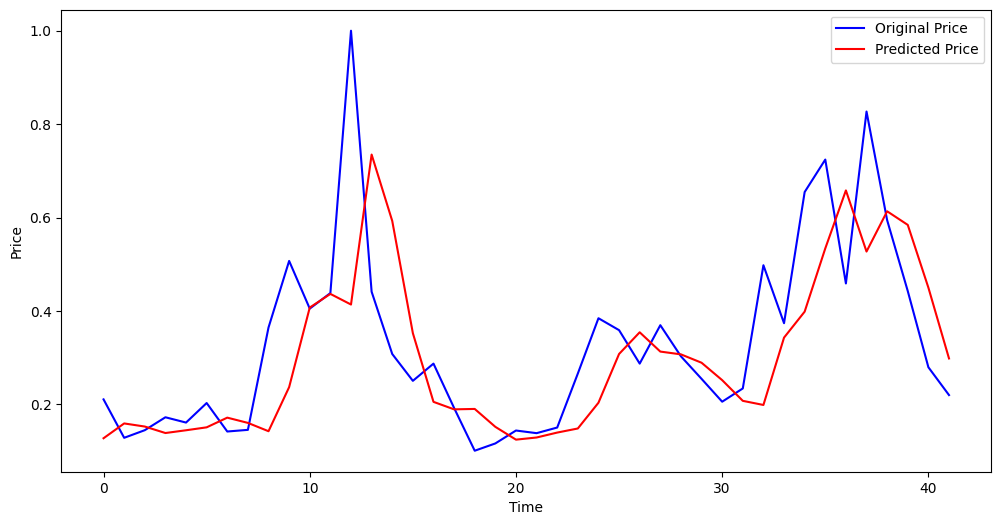

In [154]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [156]:
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))


In [157]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("RMSE (original scale):", rmse)

RMSE (original scale): 2.2942249578059393
